<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<p>
<h1>Algorísmica Avançada</h1>
<h2>Pràctica 1 - Grafs </h2>
</center>
</p>
</div>

<div class="alert alert-danger" style="width:95%; margin:0 auto; padding">
<center><p><h2> ¡¡IMPORTANTE!! </h2></p> </center> 

<p>
Para la realizacón de esta práctica tendréis que utilizar vuestra propia clase `Graph` implementada en la Práctica 0. Si dicha clase no cumple los requisitos funcionales y no pasa los tests, con muy alta probabilidad los tests propuestos para esta práctica tampoco funcionen correctamente. 
</p>
</div>

<div class="alert alert-info">
<center>
  <h1>Introducción</h1>
</center>


A lo largo de esta práctica trabajaremos con el grafo generado a partir de la red de metro de Londres. En este grafo los nodos representan las estaciones y los ejes las vias que van de una estación a otra. Todos los ejes tienen cuatro atributos:

* Linea
* Color
* Nombre (de la linea)
* Distancia


In [1]:
from graph import Graph
from util import get_subway_graph, draw_subway_graph

G, lines = get_subway_graph('csv', Graph)
G.edge[1][52]

{'name': 'District Line',
 'color': '0d6928',
 'stripe': 'NULL',
 'line': 4,
 'distance': 0.014782760229403606}

Los nodos contienen el nombre de la estación, la latitud y longitud a la que está situada la estación, el número de lineas y la zona.

In [2]:
G.node[124]

{'latitude': 51.5777,
 'longitude': -0.1458,
 'name': 'Highgate',
 'display_name': 'NULL',
 'zone': 3.0,
 'total_lines': 1,
 'rail': '0'}

Para mas consultas, la información ha sido extraida de Wikimedia Commons:

https://commons.wikimedia.org/wiki/London_Underground_geographic_maps/CSV

# util.py

En este archivo se os facilitan tres funciones que os permitiran cargar y visualizar la red de metro.
```python
"""
Retorna un objeto nx.Graph que corresponde al grafo de la red de metro y un 
diccionario con las lineas del metro
 - location: ruta donde esta almacenado el archivo .csv
 - Klass: la clase Graph que hemos desarrollado en la práctica 0
"""
G, lines = get_subway_graph(location, Klass)

"""
Dibuja el grafo que le pasemos por parametro.
- G: Grafo de la red de metro
- lines: diccionario con la información sobre las lineas del metro
- figsize: parametro opcional que nos permite definir el tamaño de la figura
- show_labels: parametro opcional que nos permite indicar si queremos mostrar los 
    nombres de las estaciones
"""
draw_metro_graph(G, lines, figsize=(10,6), show_labels=False)

```

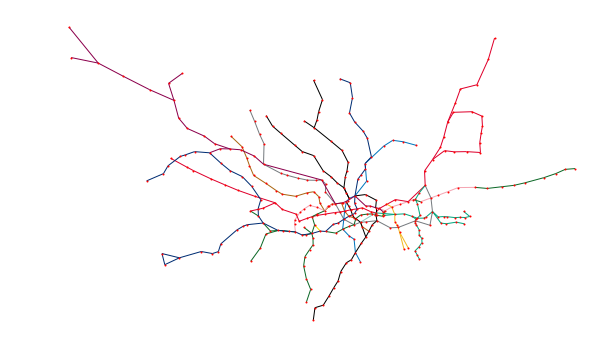

In [3]:
draw_subway_graph(G, lines, figsize=(10,6))

<div class="alert alert-info">
<center>
  <h1>Contenido</h1>
  </center><p>



<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>1- Dijkstra</p></h2>
  
  <p>
 Se propone que hagáis dos implementaciones del algoritmo <a href="https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm">Dijkstra</a>. 
 <ul><li>
 **dijkstra1:** La primera consiste en el algoritmo común en el que tendremos en cuenta las distancias definidas en los edges. 
 </li><li>
 **dijkstra2:** La segunda implementación es simplemente una ampliación del primer algoritmo en el que añadiremos una penalización por cambio de linea.</li>
 </ul>
</p>
<h3> Ejemplo _dijkstra2_</h3>
<p>
Para ilustrar lo que se pide en la práctica veamos como se calcularía el valor de **C** y **D** en el siguiente gráfico:
</p>


<p><center><img src='img/e1.png'></img></center></p>


<p>
<ul><li>
**[C]** Calculamos V(B) como V(A) + d([A,B]), calculamos V(C) como V(B) + d([B,C]), ya hemos acabado.
</li>
<li>
**[D]** Calculamos V(B) como V(A) + d([A,B]), calculamos V(D) como V(B) + d([B,D]), como [A,B] es linea azul y [B,D] es linea verde, añadimos una penalización por el transbordo a la que llamamos **P**. Por lo tanto, al final obtenemos que V(D) = V(B) + d([B,C]) + P
</li>
</ul>

<br>
-**V(X)**: Valor de X
<br>
-**d([X,Y])**: Distancia de X a Y
<br>
-**P**: Penalización por transbordo

</p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo (en el caso de esta práctica la red de metro) que utilizaremos para buscar el camino. Debe de ser un objeto de tipo `Graph` como el que habéis implementado en la Práctica 0.</li>
<li>__origen__: Este parámetro corresponde al índice de un nodo. En este caso, como indexamos los nodos con el identificador de las paradas de Metro, deberá ser un entero _(e.g. 231)_.</li>
<li>__destino__: El indice del nodo al que queremos llegar.</li>
<li>__infinity=*(int)*__: Parametro opcional en el que definimos que numero nos va bien para utilizar como infinito en el momento de inicializar los pesos de los nodos.</li>
<li>__penalty=*(int)*__: (_Solo necesario para dijkstra2)_ Es un numero entero que corresponde a la penalización que aplicamos al valor de un nodo cuando hay cambio de linea.
</ul>
<br>
<h3>OUTPUT</h3>
El output de la función es un diccionario que contiene los siguientes valores:
<ul>
<li>__ _'path'_ __: Una lista de índices correspondientes al camino encontrado del nodo inicial al nodo final __ambos nodos, inicio y final, han de estar incluidos en esta lista__.</li>
<li>__ _'expanded'_ __: El numero de nodos que se han visitado para encontrar la solución.</li>
<li>__ _'distance'_ __: La distancia del camino mínimo desde el origen hasta el destino (es decir, el valor del nodo destino).
<ul>

</p>
</div>


In [4]:
from heapq import *
from util import *

def dijkstra_heap(G, origen, desti, infinity=float('inf')):
    final = {}
    queue = [(0, origen, None)]
    expanded = 0
    
    for i in G.nodes():
        final[i] = {"dist": infinity, "parent": None} 
    
    while queue:
        total_dist, node, parent = heappop(queue) #Treiem el node amb la minima distància acumulada, podem assegurar que la distància és mínima
        if final[node]["dist"] == infinity: #Si no l'hem visitat
            expanded += 1
            final[node]["dist"] = total_dist #Li posem la distància mínima final i guardem el pare
            final[node]["parent"] = parent
            if node == desti: #Si és el destí podem acabar
                break;
                
            for neighbour in G.neighbors(node): # Per a cada veí, si no ha estat visitat, posem al heap la distància
                if final[neighbour]["dist"] == infinity: 
                    #És possible que la distància que posem sigui superior a una ja trobada, però
                    #    s'assignarà la mínima quan la treiem del heap, de manera que sabrem que les
                    #    es treguin poteriorment pel mateix node seran més grans.
                    heappush(queue, (total_dist + G.edge[neighbour][node]["distance"], neighbour, node))
    
    path = []
    node = desti
    path.append(desti)
    while final[node]["parent"]:
        path.append(final[node]["parent"])
        node = final[node]["parent"]
    path = path[::-1]
    
    return{
        'path': path,
        'expanded': expanded,
        'distance': final[desti]["dist"]
    }

def dijkstra(G, origen, desti, infinity=float('inf')):    
    #Inicialitzem els contenidors que utilitzarem
    dist = {} #Distància i parent definitiu
    no_visitats = {} #Nodes no visitats i la seva distància provisional
    path = []
    expanded = 0
    
    #Definim la distància definitiva i provisional com a infinites 
    for i in G.nodes():
        dist[i] = {"dist":infinity, "parent":None}
        no_visitats[i] = infinity
    no_visitats[origen] = 0;
    
    while no_visitats:
        min_node = min(no_visitats, key=no_visitats.get) #Busquem el node no visitat amb la mínima distància a origen
        expanded += 1
        dist[min_node]["dist"] = no_visitats[min_node] 
        if min_node == desti: #Si és el que busquem podem parar, ja haurem trobat el camí mínim
            break;
        for node in G.neighbors(min_node): #Actualitzem la distància per a els que no tinguem distància mínima assegurada
            if node in no_visitats:
                if no_visitats[node] > no_visitats[min_node] + G.edge[node][min_node]["distance"]:
                    no_visitats[node] = no_visitats[min_node] + G.edge[node][min_node]["distance"]
                    dist[node]["parent"] = min_node
        no_visitats.pop(min_node) #ja té la distància mínima, el treiem de no visitats

    node = desti
    path.append(desti)
    while dist[node]["parent"]:
        path.append(dist[node]["parent"])
        node = dist[node]["parent"]
    path = path[::-1]
    
    return{
        'path': path,
        'expanded': expanded,
        'distance': dist[desti]["dist"]
    }

In [5]:
dijkstra(G, 10, 235)

{'path': [10,
  128,
  39,
  145,
  89,
  277,
  192,
  107,
  133,
  146,
  236,
  99,
  74,
  17,
  110,
  265,
  1,
  73,
  182,
  194,
  5,
  252,
  251,
  235],
 'expanded': 276,
 'distance': 0.31895111263175857}

In [6]:
dijkstra_tester(1, Graph, dijkstra, True)
dijkstra_tester(1, Graph, dijkstra_heap, True)

Prueba 0 superada.
Prueba 1 superada.
Prueba 2 superada.
Prueba 3 superada.
Prueba 4 superada.
Prueba 5 superada.
Prueba 6 superada.
Prueba 7 superada.
Prueba 8 superada.
Prueba 9 superada.
Prueba 10 superada.
Prueba 11 superada.
Prueba 12 superada.
Prueba 13 superada.
Prueba 14 superada.
Prueba 15 superada.
Prueba 16 superada.
Prueba 17 superada.
Prueba 18 superada.
Prueba 19 superada.
Prueba 20 superada.
Prueba 21 superada.
Prueba 22 superada.
Prueba 23 superada.
Prueba 24 superada.
Prueba 25 superada.
Prueba 26 superada.
Prueba 27 superada.
Prueba 28 superada.
Prueba 29 superada.
Prueba 30 superada.
Prueba 31 superada.
Prueba 32 superada.
Prueba 33 superada.
Prueba 34 superada.
Prueba 35 superada.
Prueba 36 superada.
Prueba 37 superada.
Prueba 38 superada.
Prueba 39 superada.
Prueba 40 superada.
Prueba 41 superada.
Testeado dijkstra: 42/42 pruebas superadas. Dijkstra es correcto :D, queda en tus manos que sea eficiente.
Prueba 0 superada.
Prueba 1 superada.
Prueba 2 superada.
Prueba

In [7]:
def dijkstra2(G, origen, desti, penalty=5000000, infinity=float('inf')):
    '''
    dijkstra2 es basa en dijkstra_heap amb la diferència que considerem nodes de línies diferents com a nodes diferents.
    D'aquesta manera la distància a un node pot ser diferent per a cada línia que hi arribi. En fer aquest canvi, saber
    quin és el parent d'un node ja no és tant senzill (segons la línia amb que haguem arribat a parent, el cost serà diferent),
    de manera que també posarem al heap la línia del pare i la guardarem. D'aquesta manera tenim informació sobre les dues últimes
    arestes i reconstruir el path és molt més senzill.
    '''
    #Final és un diccionari de la forma (node, línia per la que entrem):{"dist":distància per la línia d'entrada, "parent":node d'on venim, "line": línia amb la que arribem a parent}
    final = dict() 
    queue = []
    expanded = 0
       
    # Posem al heap els adjacents a l'origen per tal d'estalviar-nos casos especials amb la línia del pare
    for neighbor in G.neighbors(origen):
        heappush(queue, (G.edge[origen][neighbor]["distance"], neighbor, origen, G.edge[origen][neighbor]["line"]))
    
    while queue:
        total_dist, node, parent, parent_line = heappop(queue) #Treiem el nodeamb la minima distància acumulada
        current_line = G.edge[parent][node]["line"] #Calculem la línia per on hem vingut
        if not (node, current_line) in final.keys(): #Si no l'hem visitat
            final[(node, current_line)] = dict()
            final[(node, current_line)].update({"dist": total_dist, "parent": parent, "line": parent_line})
            
            if node == desti:
                break;
            expanded += 1
            
            for neighbour in G.neighbors(node):
                if (neighbour, G.edge[node][neighbour]["line"]) not in final.keys(): #Si no hem arribat a neighbor per aquesta línia
                    if G.edge[node][neighbour]["line"] != current_line: #Si hem hagut de canviar de línia afegim la penalització
                        heappush(queue, (total_dist + G.edge[neighbour][node]["distance"] + penalty , neighbour, node, current_line))
                    else:    
                        heappush(queue, (total_dist + G.edge[neighbour][node]["distance"], neighbour, node, current_line))

    path = []
    while node != origen:
        path.append(node)
        parent = final[(node, current_line)]["parent"]
        parent_line = final[(node, current_line)]["line"]
        node = parent 
        current_line = parent_line       
        
    path.append(origen)
    path = path[::-1]
    return{
        'path': path,
        'expanded': expanded,
        'distance': total_dist
    }

In [8]:
dijkstra2(G, 10, 235)

{'path': [10,
  128,
  39,
  145,
  223,
  126,
  60,
  151,
  197,
  107,
  133,
  146,
  236,
  99,
  74,
  17,
  110,
  265,
  1,
  73,
  182,
  194,
  5,
  252,
  251,
  235],
 'expanded': 40,
 'distance': 0.3249863215971557}

In [15]:
dijkstra_tester(2,Graph, dijkstra2, True)

Prueba 0 superada.
Prueba 1 superada.
Prueba 2 superada.
Prueba 3 superada.
Prueba 4 superada.
Prueba 5 superada.
Prueba 6 superada.
Prueba 7 superada.
Prueba 8 superada.
Prueba 9 superada.
Prueba 10 superada.
Prueba 11 superada.
Prueba 12 superada.
Prueba 13 superada.
Prueba 14 superada.
Prueba 15 superada.
Prueba 16 superada.
Prueba 17 superada.
Prueba 18 superada.
Prueba 19 superada.
Prueba 20 superada.
Prueba 21 superada.
Prueba 22 superada.
Prueba 23 superada.
Prueba 24 superada.
Prueba 25 superada.
Prueba 26 superada.
Prueba 27 superada.
Prueba 28 superada.
Prueba 29 superada.
Prueba 30 superada.
Prueba 31 superada.
Prueba 32 superada.
Prueba 33 superada.
Prueba 34 superada.
Prueba 35 superada.
Prueba 36 superada.
Prueba 37 superada.
Prueba 38 superada.
Prueba 39 superada.
Prueba 40 superada.
Prueba 41 superada.
Testeado dijkstra2: 42/42 pruebas superadas. Dijkstra es correcto :D, queda en tus manos que sea eficiente.


No tinc clar que la solució proposada per dijkstra_tester sigui la solució correcta. Aquí hi ha un exemple de sortida de dijkstra tester modificada per tal que imprimeixi la penalització i el camí en cas que les distàncies siguin diferents. He observat que hi ha 3 possibles casos:
* Les sortides coincideixen en path i distància: passa quan el camí passa per una sola línia.
* El path és el mateix però les distàncies varien: En aquest cas, recorrent el camí amb la penalització corresponent, sembla que la distància correcta és la que dona el meu algorisme, sovint major a la que dona la correcció.
* El camí no és correcte: en aquest cas els camins són diferents, però calculant manualment el cost de cada camí amb la penalització corresponent veiem que el meu camí té cost menor al proposat.

A la cel·la següent hi ha calculades les distàncies dels camins per a la prova $1$ (la primera prova amb camins iguals i distàncies diferents) i $14$ (la primera amb camins diferents).

```python
Prueba 0 superada.
Prueba 1 fallida. 
	El path es el mismo, pero no las distancias: 
	Penalització: 6532
		 Distancia esperada : 6532.639424720588
			[6, 46, 53, 214, 168, 179, 180, 199, 184, 115, 178, 202, 282, 94, 11, 104, 90, 145, 92, 14, 167, 13, 225, 155, 284, 201]
		 Distancia obtenida : 13064.639424720586
			[6, 46, 53, 214, 168, 179, 180, 199, 184, 115, 178, 202, 282, 94, 11, 104, 90, 145, 92, 14, 167, 13, 225, 155, 284, 201]
Prueba 2 fallida. 
	El path es el mismo, pero no las distancias: 
	Penalització: 7824
		 Distancia esperada : 7824.142905913623
			[171, 61, 238, 120, 42, 41, 23, 157, 233, 279, 285, 107]
		 Distancia obtenida : 7824.1429059136235
			[171, 61, 238, 120, 42, 41, 23, 157, 233, 279, 285, 107]
Prueba 3 fallida. 
	El path es el mismo, pero no las distancias: 
	Penalització: 3455
		 Distancia esperada : 6910.217964423715
			[292, 284, 155, 225, 13, 250, 48, 126, 259, 192, 28, 162, 149, 208, 186, 122, 74, 287, 96, 195]
		 Distancia obtenida : 6910.217964423716
			[292, 284, 155, 225, 13, 250, 48, 126, 259, 192, 28, 162, 149, 208, 186, 122, 74, 287, 96, 195]
Prueba 4 fallida. 
	El path es el mismo, pero no las distancias: 
	Penalització: 7271
		 Distancia esperada : 7271.212375621988
			[279, 13, 156, 24, 164, 247, 153, 154, 275, 211, 98]
		 Distancia obtenida : 7271.212375621989
			[279, 13, 156, 24, 164, 247, 153, 154, 275, 211, 98]
Prueba 5 fallida. 
	El path es el mismo, pero no las distancias: 
	Penalització: 3937
		 Distancia esperada : 3937.2819311267563
			[132, 130, 131, 190, 30, 176, 234, 1, 265, 110, 17, 74, 287, 96, 195, 205, 80, 231, 300, 299]
		 Distancia obtenida : 3937.2819311267567
			[132, 130, 131, 190, 30, 176, 234, 1, 265, 110, 17, 74, 287, 96, 195, 205, 80, 231, 300, 299]
Prueba 6 fallida. 
	El path es el mismo, pero no las distancias: 
	Penalització: 8080
		 Distancia esperada : 0.07070933792518591
			[72, 73, 1, 265, 242, 209]
		 Distancia obtenida : 16160.070709337926
			[72, 73, 1, 265, 242, 209]
Prueba 7 fallida. 
	El path es el mismo, pero no las distancias: 
	Penalització: 940
		 Distancia esperada : 940.1697141050702
			[47, 40, 89, 145, 7, 188, 167, 13, 225, 155, 284, 201, 27]
		 Distancia obtenida : 2820.16971410507
			[47, 40, 89, 145, 7, 188, 167, 13, 225, 155, 284, 201, 27]
Prueba 8 fallida. 
	El path es el mismo, pero no las distancias: 
	Penalització: 4178
		 Distancia esperada : 4178.190760426085
			[82, 163, 11, 212, 192, 277, 89, 40, 139, 264, 8, 124, 77, 93, 288, 302, 261]
		 Distancia obtenida : 8356.190760426081
			[82, 163, 11, 212, 192, 277, 89, 40, 139, 264, 8, 124, 77, 93, 288, 302, 261]
Prueba 9 fallida. 
	El path es el mismo, pero no las distancias: 
	Penalització: 106
		 Distancia esperada : 0
			[53]
		 Distancia obtenida : 0.08962700485902918
			[53]
Prueba 10 fallida. 
	El path es el mismo, pero no las distancias: 
	Penalització: 9125
		 Distancia esperada : 9125.176583440068
			[15, 78, 270, 200, 289, 43, 79, 27, 201, 292, 42, 120, 238, 61, 171, 135, 64, 106, 69, 86, 152]
		 Distancia obtenida : 18250.17658344008
			[15, 78, 270, 200, 289, 43, 79, 27, 201, 292, 42, 120, 238, 61, 171, 135, 64, 106, 69, 86, 152]
Prueba 11 superada.
Prueba 12 superada.
Prueba 13 superada.
Prueba 14 fallida. El camino no es correcto: 
	Penalització: 739
	Camino esperado : [46, 53, 214, 168, 179, 180, 199, 184, 115, 178, 202, 282, 94, 11, 28, 192, 259, 126]
	Camino obtenido : [46, 53, 214, 168, 179, 180, 199, 184, 115, 178, 202, 282, 94, 11, 104, 90, 145, 223, 126]
Prueba 15 superada.
Prueba 16 superada.
Prueba 17 superada.
Prueba 18 fallida. 
	El path es el mismo, pero no las distancias: 
	Penalització: 6369
		 Distancia esperada : 6369.06817027263
			[244, 295, 225, 155, 284, 201, 4]
		 Distancia obtenida : 12738.068170272629
			[244, 295, 225, 155, 284, 201, 4]
Prueba 19 superada.
Prueba 20 superada.
Prueba 21 fallida. El camino no es correcto: 
	Penalització: 8492
	Camino esperado : [249, 11, 28, 107, 285, 279, 13, 225, 155, 284, 201, 27, 79, 43, 219, 63, 203, 217]
	Camino obtenido : [249, 11, 28, 107, 285, 279, 233, 157, 23, 41, 42, 292, 201, 27, 79, 43, 219, 63, 203, 217]
Prueba 22 fallida. El camino no es correcto: 
	Penalització: 2464
	Camino esperado : [215, 301, 241, 230, 154, 153, 247, 164, 24, 156, 167, 188, 7, 145, 89, 40, 139, 264, 8]
	Camino obtenido : [215, 301, 241, 230, 154, 153, 247, 164, 24, 156, 13, 250, 48, 126, 259, 192, 277, 89, 40, 139, 264, 8]
Prueba 23 fallida. 
	El path es el mismo, pero no las distancias: 
	Penalització: 8182
		 Distancia esperada : 8182.146958924429
			[298, 137, 206, 143, 159, 278, 193, 82, 163, 11, 212, 192, 277, 89, 170]
		 Distancia obtenida : 16364.14695892443
			[298, 137, 206, 143, 159, 278, 193, 82, 163, 11, 212, 192, 277, 89, 170]
Prueba 24 fallida. 
	El path es el mismo, pero no las distancias: 
	Penalització: 1426
		 Distancia esperada : 1426.1876047874575
			[292, 284, 155, 225, 13, 167, 188, 7, 145, 89, 40, 139, 264, 8, 124]
		 Distancia obtenida : 4278.187604787457
			[292, 284, 155, 225, 13, 167, 188, 7, 145, 89, 40, 139, 264, 8, 124]
Prueba 25 superada.
Prueba 26 fallida. El camino no es correcto: 
	Penalització: 3655
	Camino esperado : [203, 63, 219, 43, 79, 27, 201, 284, 155, 225, 13, 250, 48, 126, 259, 192, 28, 11, 163, 82, 193, 278, 159, 143, 206, 137, 298, 113, 246, 281, 185, 237]
	Camino obtenido : [203, 63, 219, 43, 79, 27, 201, 284, 155, 225, 13, 250, 48, 126, 259, 192, 212, 11, 163, 82, 193, 278, 159, 143, 206, 137, 298, 113, 246, 281, 185, 237]
Prueba 27 fallida. El camino no es correcto: 
	Penalització: 8633
	Camino esperado : [77, 124, 8, 264, 139, 40, 89, 277, 102, 259, 151, 197, 107, 133, 146, 236, 99, 74, 17, 110, 265, 1, 73, 182, 194, 5, 252, 251, 235, 210, 75, 222, 220, 134, 125, 271]
	Camino obtenido : [77, 124, 8, 264, 139, 40, 89, 277, 192, 107, 133, 146, 236, 99, 74, 17, 110, 265, 1, 73, 182, 194, 5, 252, 251, 235, 210, 75, 222, 220, 134, 125, 271]
Prueba 28 fallida. El camino no es correcto: 
	Penalització: 4618
	Camino esperado : [144, 282, 94, 254]
	Camino obtenido : [144, 282, 172, 71, 297, 142, 290, 94, 254]
Prueba 29 superada.
Prueba 30 superada.
Prueba 31 superada.
Prueba 32 superada.
Prueba 33 fallida. 
	El path es el mismo, pero no las distancias: 
	Penalització: 4376
		 Distancia esperada : 4376.170613713806
			[279, 13, 156, 24, 164, 247, 153, 154, 230]
		 Distancia obtenida : 4376.170613713807
			[279, 13, 156, 24, 164, 247, 153, 154, 230]
Prueba 34 fallida. El camino no es correcto: 
	Penalització: 1653
	Camino esperado : [45, 207, 144, 282, 94, 11, 28, 107, 285, 279, 233, 157, 23, 41, 42, 120, 238, 61, 171, 135, 64, 106, 69, 86]
	Camino obtenido : [45, 207, 144, 282, 172, 71, 297, 142, 290, 94, 254, 249, 11, 28, 107, 285, 279, 233, 157, 23, 41, 42, 120, 238, 61, 171, 135, 64, 106, 69, 86]
Prueba 35 fallida. El camino no es correcto: 
	Penalització: 2530
	Camino esperado : [144, 282, 94, 11, 28, 107, 285, 279, 233, 157, 23, 41, 42, 120]
	Camino obtenido : [144, 282, 172, 71, 297, 142, 290, 94, 254, 249, 11, 28, 107, 285, 279, 233, 157, 23, 41, 42, 120]
Prueba 36 fallida. El camino no es correcto: 
	Penalització: 6231
	Camino esperado : [123, 145, 92, 14, 167, 156, 3, 295, 244, 164, 33, 36]
	Camino obtenido : [123, 145, 89, 277, 192, 107, 285, 279, 233, 157, 23, 41, 42, 183, 43, 289, 36]
Prueba 37 superada.
Prueba 38 fallida. El camino no es correcto: 
	Penalització: 8282
	Camino esperado : [117, 116, 132, 130, 131, 190, 30, 176, 234, 1, 265, 110, 17, 74, 99, 236, 146, 133, 107, 197, 49, 87, 279, 13, 156, 3, 295]
	Camino obtenido : [117, 116, 132, 130, 131, 190, 30, 176, 234, 1, 265, 110, 17, 74, 99, 236, 146, 133, 107, 197, 151, 60, 126, 48, 250, 13, 156, 3, 295]
Prueba 39 superada.
Prueba 40 superada.
Prueba 41 superada.
Testeado dijkstra2_first: 18/42 pruebas superadas. Dijkstra ha pasado alguna de las pruebas, revisa el codigo.
```

In [10]:
'''Càlcul de distància pel camí de la prova 1'''
path_meu = [6, 46, 53, 214, 168, 179, 180, 199, 184, 115, 178, 202, 282, 94, 11, 104, 90, 145, 92, 14, 167, 13, 225, 155, 284, 201]
path_seu = [6, 46, 53, 214, 168, 179, 180, 199, 184, 115, 178, 202, 282, 94, 11, 104, 90, 145, 92, 14, 167, 13, 225, 155, 284, 201]

dist1 = G.edge[6][46]["distance"]
dist2 = G.edge[6][46]["distance"]

for i in range(1, len(path_meu)-1):
    dist_sum = G.edge[path_meu[i]][path_meu[i+1]]["distance"]
    if G.edge[path_meu[i]][path_meu[i+1]]["line"] != G.edge[path_meu[i]][path_meu[i-1]]["line"]:
        dist_sum += 6532
    dist1 += dist_sum
print("Distància pel meu cami de la prova1", dist1)

for i in range(1, len(path_seu)-1):
    dist_sum2 = G.edge[path_seu[i]][path_seu[i+1]]["distance"]
    if G.edge[path_seu[i]][path_seu[i+1]]["line"] != G.edge[path_seu[i]][path_seu[i-1]]["line"]:
        dist_sum2 += 6532
    dist2 += dist_sum2
print("Distància pel camí proposat de la prova1", dist2)
print("Distància calculada dijkstra2", 13064.639424720586)
print("Distància calculada dijkstra_tester", 6532.639424720588)

print("________________________________________________\n")


'''Càclul de distàncies pels camins de la prova 14'''
path_meu = [46, 53, 214, 168, 179, 180, 199, 184, 115, 178, 202, 282, 94, 11, 104, 90, 145, 223, 126]
path_seu = [46, 53, 214, 168, 179, 180, 199, 184, 115, 178, 202, 282, 94, 11, 28, 192, 259, 126]
dist1 = G.edge[46][53]["distance"]
dist2 = G.edge[46][53]["distance"]

for i in range(1, len(path_meu)-1):
    dist_sum = G.edge[path_meu[i]][path_meu[i+1]]["distance"]
    if G.edge[path_meu[i]][path_meu[i+1]]["line"] != G.edge[path_meu[i]][path_meu[i-1]]["line"]:
        dist_sum += 739
    dist1 += dist_sum
print("Distància pel meu camí de la prova14", dist1)

for i in range(1, len(path_seu)-1):
    dist_sum2 = G.edge[path_seu[i]][path_seu[i+1]]["distance"]
    if G.edge[path_seu[i]][path_seu[i+1]]["line"] != G.edge[path_seu[i]][path_seu[i-1]]["line"]:
        dist_sum2 += 739
    dist2 += dist_sum2
print("Distància pel camí proposat de la prova14", dist2)

Distància pel meu cami de la prova1 13064.639424720586
Distància pel camí proposat de la prova1 13064.639424720586
Distància calculada dijkstra2 13064.639424720586
Distància calculada dijkstra_tester 6532.639424720588
________________________________________________

Distància pel meu camí de la prova14 739.4927518218915
Distància pel camí proposat de la prova14 1478.4842172005851


<div class="alert alert-warning" style="width:80%; margin:0 auto; padding">
<center><p><h3> Comentarios Dijkstra</h3></p> </center> </div>

La primera implementació és la implementació classica de l'algorisme de Dijkstra amb un diccionari, de manera que per trobar el node amb mínim cost s'ha de recórrer el diccionari, operació amb complexitat $O(|V|)$. S'haurà de buscar el mínim node mentre hi hagi nodes no visitats, és a dir, un total de $|V|$ vegades. Les operacions de calcular i actualitzar (que s'executen una vegada per aresta, és a dir $|E|$ vegades) tenen cost constant, així que la complexitat de dijkstra havent de trobar cada cop el mínim és de $O(|V|^2)$.

Si implementem dijkstra amb heaps podem millorar una mica aquesta fita. Inserir en un heap o treure'n el primer element tenen un cost de $log(|V|)$. Heurem de treure $|V|$ elements del heap i com que recorrerem cada aresta una vegada, haurem d'inserir $|E|$ nodes al heap. Així tenim $O(|V|log(|V|) + |E|log(|V|)) = O((|V|+|E|)log(|V|))$

<div class="alert alert-warning" style="width:80%; margin:0 auto; padding">
<center><p><h3> Comentarios Dijkstra2</h3></p> </center> </div>

Dijkstra2 es basa en Dijkstra1 amb heap amb algunes modificacions. La primera és que considerarem nodes als que s'arriben per línies diferents com a nodes diferents. Així podem, per exemple, arribar al node $v$ per la línia $1$ amb un cost de $2$ i per la línia $3$ amb un cost $20$. Per calcular les distàncies tinguent en compte aixó, a part de saber la línia d'una aresta necessitem saber a partir de quin node la calculem, és a dir, de quina línia venim. Per fer això utilitzarem tuples de 4 elements en lloc de 3, guardant la informació de la línia per on hem arribat. Al acabar l'execució tindrem: (node, línia per on arribem):(distància a l'origen, pare, línia amb la que arribem al pare). Amb aquesta informació sempre podem reconstruir el camí que ofereix el cost mínim.

La complexitat d'aquest algorisme és similar a la de dijkstra amb la diferència que per contar el cardinal de nodes hauríem multiplicar cada node pel nombre de línies que li arriben. En el pitjor dels casos cada node li arriben totes les línies. Si $n$ és el nombre de línies, aleshores el nombre de nodes sobre el que s'executa dijkstra2 és $|V|_{d2} = [V|\times n$ i la complexitat és $O(|E|+|V|_{d2})log(|V|_{d2}))$

<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>2- Matriz de distancias</p></h2>
   <p>
 Se propone el desarrollo de un algoritmo que dado un grafo construya una matriz de $V \times V$ (donde $V$ es el número de vértices del grafo) que contenga la distancia mínima de cada vértice al resto. 
</p>

<p></p>

<p>
<b> Nota: </b> Recordad que en Algorítmica Avanzada buscamos la implementación de algoritmos que no solo resuelvan el problema, sino que lo hagan de manera eficiente
</p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo (en el caso de esta práctica la red de metro) sobre el que calcularemos la matriz de distancias. Debe de ser un objeto de tipo `Graph` como el que habéis implementado en la Práctica 0.</li>
</ul>
<br>
<h3>OUTPUT</h3>
<ul>
<li>El output de la función es un diccionario cuya clave es un nodo (origen) y el valor es otro diccionario con la forma $\{nodo\_destino: distancia\}$.</li>
    </ul>

</p>
</div>


In [11]:
def dist_mat(G):
    infinity=float('inf')
    mat = dict((node, dict(((node,infinity) for node in G.nodes()))) for node in G.nodes()) #Inicialitzem la matriu
    
    #Fem execució de dijkstra per a cada node
    for origen in G.nodes(): 
        final = {}
        
        #Si ja coneixem la distància, la posem com a calculada. En cas contrari és infinit
        for node in G.nodes(): 
            final[node] = mat[origen][node]
        queue = [(0, origen)]
        
        while queue:
            dist, node = heappop(queue)
            #El node que treiem del heap té distància mínima coneguda i el guardem a la matriu si no en tenim una millor
            if final[node] == infinity:
                final[node] = dist
                mat[origen][node] = dist
                mat[node][origen] = dist
                
                for neighbor in G.neighbors(node):
                    if final[neighbor] == infinity:
                        heappush(queue, (dist + G.edge[node][neighbor]["distance"], neighbor))     
    
    return mat

In [12]:
mat = dist_mat(G)
print(mat)

{11: {11: 0, 163: 0.006000833275470941, 212: 0.010530432089900585, 49: 0.037967300617001126, 87: 0.0404411639923731, 197: 0.028298277915611653, 82: 0.01145977090105391, 193: 0.020292097887754608, 84: 0.06696711679941772, 148: 0.05459779992256631, 279: 0.049297799922566166, 113: 0.11309438221856338, 246: 0.13304055979723736, 298: 0.10274788522682791, 114: 0.21254352870538779, 140: 0.19072564613168258, 137: 0.0798419907889325, 206: 0.05920755355405703, 237: 0.17665937441526394, 143: 0.04836135606369225, 159: 0.038448737842455886, 278: 0.03167673666111857, 185: 0.1673809047138569, 281: 0.1549531132769221, 192: 0.019335577429707786, 13: 0.07308374813783874, 156: 0.07906462240897498, 250: 0.06428715788933898, 16: 0.28982225844908543, 91: 0.300518519478059, 173: 0.2797505157994761, 24: 0.1079679094192788, 164: 0.12967411446548902, 28: 0.011395174417265829, 162: 0.020614718874559075, 37: 0.26694799301366867, 158: 0.28394358067634856, 301: 0.24342863928104758, 48: 0.049946655806077996, 126: 0.

<div class="alert alert-warning" style="width:80%; margin:0 auto; padding">
<center><p><h3> Comentarios Matriz de Distancias</h3></p> </center> </div>

Per la matriu de distàncies hem fet una viarant de l'algorisme de Dijkstra estàndard. Hem tret la optimització que havíem fet a Dijkstra per tal que parés al trobar el node final, de manera que ara seguirà fins a tenir la distància mínima entre el node inicial i la resta de nodes del graf. Amb això passem d'haver de fer $|V|^2$ execucions de dijkstra (cada parella de nodes) a haver-ne de fer $|V|$. Això, però, podem millorar-ho. Suposem que hem calculat la distància de  $v$ a tota la resta de nodes i ara ens disposem a calcular la distància de $u$ a la resta de nodes. Coneixem la distància de $v$ a $u$, de manera que no ens cal calcular-la altre cop. D'aquesta manera l'execució de dijkstra inicial es farà sobre $|V|$ nodes, però la segona sobre $|V|-1$, la tercera sobre $|V|-2$ i així successivament. En el pitjor dels casos en estalviar-nos de calcular un node ens estalviem de calcular una única aresta, així que el nombre d'arestes també va decrementatnt en 1. D'aquesta manera, el cost és de $\sum_{i=0}^{|V|-1}((|E|-i)+(|V|-i))log(|V|-i)$. Tot i així, aproximant a l'alça, la complexitat serà de l'ordre de $|V|$ vegades dijkstra1, és a dir de l'ordre de $O(|V|((|E|+|V|)log(|V|))) = O(|V||E|log(|V|) + |V|^2 log(|V|))$ 

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>
<p>
La entrega de esta práctica se podrá realizar en el campus virtual hasta el día __21 de Octubre a las 23:55__. En la tarea que se habilitará en el campus deberéis colgar __el archivo .ipynb__ asi como __el fichero .pyc con vuestra clase grafo__ con los nombres:
</p>
<p>
```
* AA_P1_<apellido1>_<apellido2>_<nombre>.ipynb
* graphs.pyc
```

</p>
<p>
Por ejemplo:
</p>
<p>
```
AA_P1_Doe_Ritchie_John.ipynb
```

</p>
<p>

Es fundamental que el código esté bién comentado y con un análisis de complejidad exhaustivo del algoritmo.
</p>
</div>